
# Model Training and Evaluation

This notebook is designed to train and evaluate models on preprocessed data. It includes the following steps:
1. Splitting the dataset into training and testing subsets (manual implementation).
2. Training three models from Scikit-learn and two models from other libraries (e.g., XGBoost, LightGBM).
3. Selecting appropriate metrics based on the problem (classification or regression).
4. Manually implementing two of the chosen metrics.
5. Comparing the results and selecting the best model.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load preprocessed data
data = pd.read_csv("../data/processed/scaled_results/Employee_MedianMode_imputed_standard_scaled.csv")

X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot'].astype(int)

data.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,-0.027091,0.502502,-0.271910,0.064514,-0.664417,False,False,False,False,True,False
1,-1.157619,-3.185417,-0.271910,0.064514,1.505079,False,False,False,True,False,False
2,-0.592355,0.502502,1.901592,-0.608547,-0.664417,False,False,True,False,False,False
3,0.538173,0.502502,-0.489260,1.410638,1.505079,True,False,False,False,True,False
4,1.103437,0.502502,-1.141310,-0.608547,1.505079,True,False,False,True,True,True


In [14]:
# Manual split into train and test sets
def manual_train_test_split(X, y, test_size=0.2, random_state=10):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Train and evaluate models
models = {
    "Logistic Regression": LogisticRegression(random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "SVM": SVC(random_state=10),
    "XGBoost": XGBClassifier(random_state=10, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=10)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='binary')
    results[name] = {"Accuracy": accuracy, "F1 Score": f1}

results

/Users/kbojan/Studia/Magisterka/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1124, number of negative: 2599
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 3723, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.301907 -> initscore=-0.838233
[LightGBM] [Info] Start training from score -0.838233


{'Logistic Regression': {'Accuracy': 0.7741935483870968,
  'F1 Score': 0.5643153526970954},
 'Random Forest': {'Accuracy': 0.867741935483871,
  'F1 Score': 0.7775768535262206},
 'SVM': {'Accuracy': 0.8698924731182796, 'F1 Score': 0.7677543186180422},
 'XGBoost': {'Accuracy': 0.8655913978494624, 'F1 Score': 0.7739602169981917},
 'LightGBM': {'Accuracy': 0.8763440860215054, 'F1 Score': 0.7858472998137802}}

In [16]:
def manual_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def manual_f1_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    return f1

example_model = models["Logistic Regression"]
example_predictions = example_model.predict(X_test)

manual_acc = manual_accuracy(y_test.values, example_predictions)
manual_f1 = manual_f1_score(y_test.values, example_predictions)

manual_acc, manual_f1

(0.7741935483870968, 0.5643153526970955)

In [17]:
from tabulate import tabulate

results_df = pd.DataFrame(results).T

print("Results:\n")
print(tabulate(results_df, headers="keys", tablefmt="pretty"))

best_model = results_df["F1 Score"].idxmax()
print(f"\nBest Model: {best_model}")

Results:

+---------------------+--------------------+--------------------+
|                     |      Accuracy      |      F1 Score      |
+---------------------+--------------------+--------------------+
| Logistic Regression | 0.7741935483870968 | 0.5643153526970954 |
|    Random Forest    | 0.867741935483871  | 0.7775768535262206 |
|         SVM         | 0.8698924731182796 | 0.7677543186180422 |
|       XGBoost       | 0.8655913978494624 | 0.7739602169981917 |
|      LightGBM       | 0.8763440860215054 | 0.7858472998137802 |
+---------------------+--------------------+--------------------+

Best Model: LightGBM


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_metrics(results_df):
    results_df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Performance Comparison")
    plt.ylabel("Score")
    plt.xlabel("Models")
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.grid(axis='y')
    plt.show()

def plot_confusion_matrices(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix: {name}")
        plt.show()

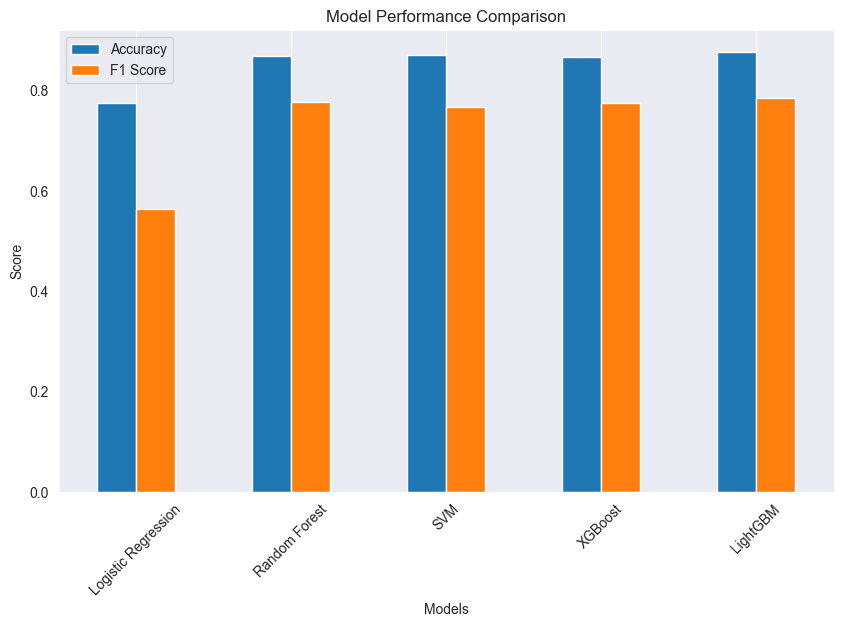

In [19]:
plot_metrics(results_df)

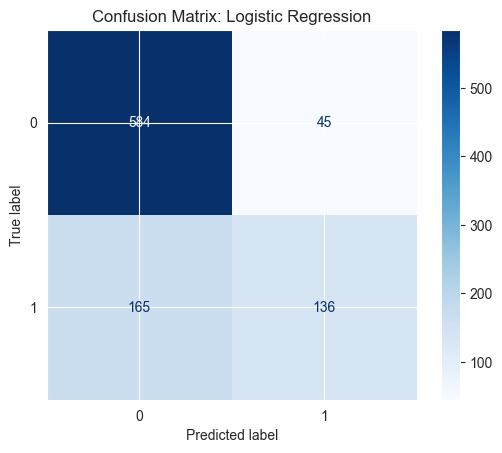

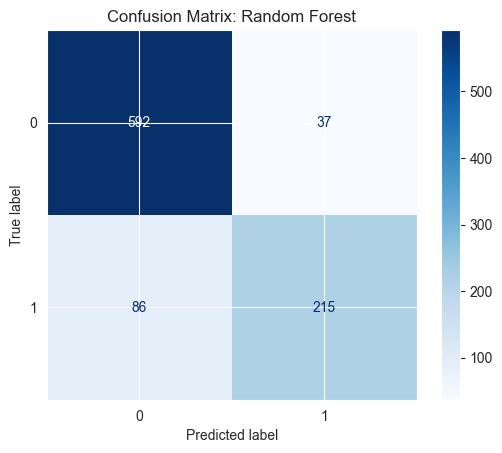

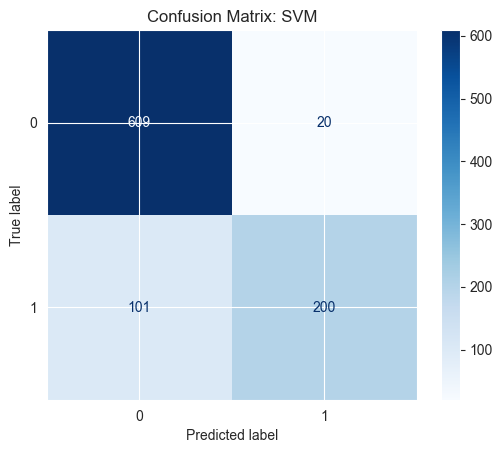

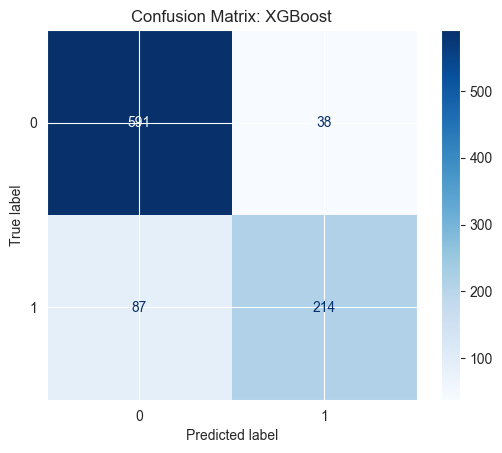

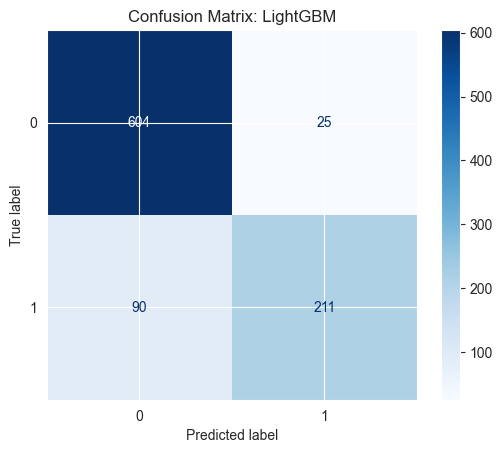

In [20]:
plot_confusion_matrices(models, X_test, y_test)